# Local Expert Identifier Model

## Purpose: 
Identify 'local experts' among Yelp users

## Procedure
Steps to identifying 'local experts':
1. Cluster by Gaussian Mixture Model
2. Find mean of most probable mixture component

## Dataset
### Reviews

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

In [3]:
import_file = 'userReview.json'
review = pd.read_json(import_file, lines=True)
review['user_latitude']=pd.Series()
review['user_longitude']=pd.Series()
review['user_city']=pd.Series()
review['user_state']=pd.Series()
review

,business_id,latitude,longitude,review_count,review_id,stars_x,stars_y,user_id,user_latitude,user_longitude,user_city,user_state
0,uYHaNptLzDLoV_JZ_MuzUA,55.950875,-3.191463,4,VfBHSwC5Vz_pbFluy07i9Q,5,4.0,cjpdDjZyprfyDG3RlkVG3w,NaN,NaN,NaN,NaN
1,Nvi9RLcOdrJvSwcw-ziZQQ,55.945860,-3.206205,4,gieaGL6UEtNGMJRpOPUHjg,5,3.5,cjpdDjZyprfyDG3RlkVG3w,NaN,NaN,NaN,NaN
2,uYHaNptLzDLoV_JZ_MuzUA,55.950875,-3.191463,169,3zRpneRKDsOPq92tq7ybAA,3,4.0,bjTcT8Ty4cJZhEOEo01FGA,NaN,NaN,NaN,NaN
3,D2smJ2r0RrVoe0aGlT-2wA,55.952860,-3.198621,169,BVwTKOMnEevDQI8n_CHjGg,5,3.5,bjTcT8Ty4cJZhEOEo01FGA,NaN,NaN,NaN,NaN
4,6Kl2SQp-zGo-nsdImLykxw,55.949990,-3.188796,169,X3dAS9SjWLi25zexhZtOQA,5,4.0,bjTcT8Ty4cJZhEOEo01FGA,NaN,NaN,NaN,NaN
5,WbddSfX26mRGXpyuy2ClYQ,45.501846,-73.558826,169,mpajk91608DKrZdvHLt7KA,5,4.0,bjTcT8Ty4cJZhEOEo01FGA,NaN,NaN,NaN,NaN
6,sQS0mRR_N-K3lzV8v3DFcw,55.948890,-3.186663,169,4xts4YYUJNAE40rocQc_jA,5,4.0,bjTcT8Ty4cJZhEOEo01FGA,NaN,NaN,NaN,NaN
7,um_o0pxQ3DlRI9EfCzw0hw,45.511072,-73.565886,169,Ockks8bbodc8GySKStpF2Q,5,4.5,bjTcT8Ty4cJZhEOEo01FGA,NaN,NaN,NaN,NaN
8,Eho3fnzWStx4YgXkhbVNQQ,55.950736,-3.190259,169,6-rJWGMHGyJLusWK0svZrw,5,4.5,bjTcT8Ty4cJZhEOEo01FGA,NaN,NaN,NaN,NaN
9,xNpD5ObRmK0q87f6QU283A,45.501225,-73.559362,169,z6O-NERFYyYB2SbkJgoanA,5,3.5,bjTcT8Ty4cJZhEOEo01FGA,NaN,NaN,NaN,NaN


### Users

In [11]:
users = review['user_id'].drop_duplicates()
users.index = range(len(users))
users

0          cjpdDjZyprfyDG3RlkVG3w
1          bjTcT8Ty4cJZhEOEo01FGA
2          AXgRULmWcME7J6Ix3I--ww
3          oU2SSOmsp_A8JYI7Z2JJ5w
4          0xtbPEna2Kei11vsU-U2Mw
5          rW8q706dz5-NnXDzMwVkiw
6          yx8vNXUL0D0HS8rUIC7AFA
7          zXnH6W74FAJQ7q7b-NuBsA
8          c5yp5hxwC1N98MjbV2LyWQ
9          xJisL5w4wOgiYLokGMT_IA
10         tgV6tsYQ66DZ3LQKvtC6cw
11         Q-3YCVywc03w56wYtGlKvg
12         Cx4UCow0zQgFQOp47RRRaA
13         eqWEgMH-DCP74i82BEAZzw
14         d0DGZRp6lHXGECJSc_nn-A
15         IpLZ7RevQrFPJWYc9Gxymg
16         kzyLOqiJvyw_FWFTw2rjiQ
17         WZXp9-V2dqRRJqhGgRqueA
18         XylT12exfdLiI_3uDLVIpw
19         Ji9PeffxjwqPLO7pEfSpKQ
20         TLIWzAJPrET0zX4_vgvLhg
21         JZEiTNWBwmv6MOOXYCAaMQ
22         E56sVQT5-OWfSejJrma8_w
23         4WYICo4emecA9r7sPYQkBw
24         P8mVj7AZwJTFFH5FXbbmUg
25         7Y4NEBQqWg7j-TvrQi6UZQ
26         vgZqQqe8cj6SBMH0EqDliw
27         O7G_c6wFXSygr82qs0GAcA
28         UG4EKu13JRwzRix6ESINdg
29         ZZG

#### Total of 1,183,362 users included in Yelp Dataset

## Locating the User using user's review locations

In [144]:
# Return array of latitudes and array of longitudes corresponding to given user
def user_locations(user):
    user = [user]
    tmp = review.query('user_id == @user').reset_index(drop=True)
    #print('User: %s' % user)
    #print('Reviews Included: %d' % len(tmp))
    #print('Total Reviews: %d' % tmp['review_count'][0])
    return tmp['latitude'], tmp['longitude']

In [145]:
import gmplot
user = 'eqWEgMH-DCP74i82BEAZzw'
loc = user_locations(user)
gmap = gmplot.GoogleMapPlotter(36, -150, 16)
gmap.scatter(loc[0], loc[1], 'cornflowerblue', edge_width=10)
gmap.draw("%s.html" % user)

User: ['eqWEgMH-DCP74i82BEAZzw']

Reviews Included: 161

Total Reviews: 359

### Google Maps Plot of User: 'eqWEgMH-DCP74i82BEAZzw'
<img src="week4images/user_map.png">

## Modeling using Gaussian Mixture Models

In [141]:
def map_centers(user, components):
    user_location = user_locations(user)
    latitudes = user_location[0]
    longitudes = user_location[1]
    
    X_train = []
    for i in range(len(latitudes)):
        X_train.append([latitudes[i],longitudes[i]])
    X_train = np.array(X_train)
    
    clusters = mixture.GaussianMixture(n_components=components, covariance_type='full')  
    clusters.fit(X_train)
    centers = clusters.means_
    latitudes_c = []
    longitudes_c = []
    for center in centers:
        latitudes_c.append(center[0])
        longitudes_c.append(center[1])
    gmap = gmplot.GoogleMapPlotter(latitudes_c[0], longitudes_c[0], 13)
    gmap.scatter(latitudes, longitudes, 'cornflowerblue', edge_width=10)
    gmap.scatter(latitudes_c, longitudes_c, 'red', edge_width=20)
    gmap.draw("maps/%d.html" % components)

In [142]:
map_centers('eqWEgMH-DCP74i82BEAZzw', 2)

User: ['eqWEgMH-DCP74i82BEAZzw']
Reviews Included: 161
Total Reviews: 359


### Iteratively reducing number of clusters

User: 'eqWEgMH-DCP74i82BEAZzw' 

4 Components
<img src="week4images/4centers.png">
<img src="week4images/4centersClose.png">
3 Components
<img src="week4images/3centers.png">
2 Components
<img src="week4images/2centers.png">
<img src="week4images/center.png">
<img src="week4images/center_w_reviews.png">

## Further work to improve identifier
#### Use review dates to determine the span of time user has been at the city
#### Use review_count to determine ratio of the user's reviews that are in the city

## Applying "Local Expert Identifier" to review data

In [12]:
COORDINATE_DIFFERENCE = 0.4

def same_city(a,b):
    if abs(a[0]-b[0])<COORDINATE_DIFFERENCE and abs(a[1]-b[1])<COORDINATE_DIFFERENCE:
        return True
    else:
        return False

In [13]:
def estimate_clusters_number(locations):
    i =1 
    while i < len(locations):
        if same_city(locations[0],locations[i]):
            return i
        i = i+1
    return len(locations)

In [14]:
def gmm(latitudes, longitudes):
    X_train = []
    for i in range(len(latitudes)):
        X_train.append([latitudes[i],longitudes[i]])
    X_train = np.array(X_train)
    
    if len(X_train) > 12:
        components = 12
    else:
        components = len(X_train)
        
    # fit a Gaussian Mixture Model with one component
    clf = mixture.GaussianMixture(n_components=components, covariance_type='full')
    clf.fit(X_train)
    components = estimate_clusters_number(clf.means_)
    clusters = mixture.GaussianMixture(n_components=components, covariance_type='full')  
    clusters.fit(X_train)
    
    return clusters

In [15]:
import reverse_geocoder as rg
def locate(latitudes, longitudes):
    # create training set
    X_train = []
    for i in range(len(latitudes)):
        X_train.append([latitudes[i],longitudes[i]])
    X_train = np.array(X_train)

    # fit a Gaussian Mixture Model with one component
    clf = gmm(latitudes, longitudes)
    center = clf.means_[0]
    
    # print location
    coordinates = (center[0], center[1])
    results = rg.search(coordinates)[0]    
    #print('User is located at: %s, %s' % (center[0],center[1]))
    #print('%s, %s' % (results['name'],results['admin1']))
    
    # plot users reviews on scatterplot
    #scatterplot(X_train, center, clf)
    
    return center[0], center[1], results['name'], results['admin1']

In [16]:
def locate_user(user):
    loc = user_locations(user)
    return locate(loc[0], loc[1])

In [41]:
user_lats = [] 
user_longs = []
user_cities = []
user_states = []
i = 0
for user in users[:1000]: 
    loc = locate_user(user) 
    user_lats.append(loc[0])
    user_longs.append(loc[1])
    user_cities.append(loc[2])
    user_states.append(loc[3])
    print(i)
    i = i+1

User: [u'cjpdDjZyprfyDG3RlkVG3w']
Reviews Included: 2
Total Reviews: 4
0
User: [u'bjTcT8Ty4cJZhEOEo01FGA']
Reviews Included: 11
Total Reviews: 169
1
User: [u'AXgRULmWcME7J6Ix3I--ww']
Reviews Included: 9
Total Reviews: 341
2
User: [u'oU2SSOmsp_A8JYI7Z2JJ5w']
Reviews Included: 5
Total Reviews: 210
3
User: [u'0xtbPEna2Kei11vsU-U2Mw']
Reviews Included: 1
Total Reviews: 40
4
User: [u'rW8q706dz5-NnXDzMwVkiw']
Reviews Included: 4
Total Reviews: 5
5
User: [u'yx8vNXUL0D0HS8rUIC7AFA']
Reviews Included: 10
Total Reviews: 209
6
User: [u'zXnH6W74FAJQ7q7b-NuBsA']
Reviews Included: 13
Total Reviews: 90
7
User: [u'c5yp5hxwC1N98MjbV2LyWQ']
Reviews Included: 7
Total Reviews: 84
8
User: [u'xJisL5w4wOgiYLokGMT_IA']
Reviews Included: 2
Total Reviews: 5
9
User: [u'tgV6tsYQ66DZ3LQKvtC6cw']
Reviews Included: 15
Total Reviews: 721
10
User: [u'Q-3YCVywc03w56wYtGlKvg']
Reviews Included: 6
Total Reviews: 68
11
User: [u'Cx4UCow0zQgFQOp47RRRaA']
Reviews Included: 2
Total Reviews: 410
12
User: [u'eqWEgMH-DCP74i82BEA

108
User: [u'T5MGS0NHBCWgofZ6Q6Btng']
Reviews Included: 24
Total Reviews: 48
109
User: [u'NtkMuGqcis30GjAkq91etA']
Reviews Included: 55
Total Reviews: 72
110
User: [u'unEY79t6hHECP9Yd58R1dg']
Reviews Included: 147
Total Reviews: 206
111
User: [u'UwfgmOOul1fc79IcI5h2MQ']
Reviews Included: 3
Total Reviews: 3
112
User: [u'kqsBiDRm1u34Q0RqN62QIA']
Reviews Included: 54
Total Reviews: 71
113
User: [u'BYgAy3hu2s5GeiJ5WMuD0w']
Reviews Included: 2
Total Reviews: 32
114
User: [u'iIZhrDYOmcyGdiWSWAldmw']
Reviews Included: 3
Total Reviews: 17
115
User: [u'tV0N0henYG4krjjA7glZhA']
Reviews Included: 2
Total Reviews: 3
116
User: [u'Rt1sD4KdPD6Uquf9BIsw2Q']
Reviews Included: 10
Total Reviews: 44
117
User: [u'xU3FI_O1XrjGRzOiFWvjBw']
Reviews Included: 10
Total Reviews: 13
118
User: [u'b7zWPM3MDi074PbSw9GSIA']
Reviews Included: 11
Total Reviews: 12
119
User: [u'vUeijF36ja09bwzjUkoNpA']
Reviews Included: 1
Total Reviews: 1
120
User: [u'nbeZzsqfROHS9Ol2V4nyUA']
Reviews Included: 1
Total Reviews: 11
121
Us

215
User: [u'gMfkWTxRVZtJAMm_adQKsQ']
Reviews Included: 60
Total Reviews: 72
216
User: [u'hrA2TKOiPrJ0Va3ceAgq9g']
Reviews Included: 129
Total Reviews: 186
217
User: [u'3Le78qZoyKE0Od0sGU8EBA']
Reviews Included: 9
Total Reviews: 12
218
User: [u'zbSBmoujGgIPuNWQcny14g']
Reviews Included: 89
Total Reviews: 96
219
User: [u'AlXx0P-OhUylep0jNi773g']
Reviews Included: 174
Total Reviews: 236
220
User: [u'Ce9f0fGVphaywABOvwGOCw']
Reviews Included: 2
Total Reviews: 2
221
User: [u'EhO5C7t3yfGFLvsTyK5PPw']
Reviews Included: 112
Total Reviews: 155
222
User: [u'gW4UsZSf81Xqc29eE2yqCg']
Reviews Included: 8
Total Reviews: 16
223
User: [u'fCy0RLrVg6xyhaNRpZtBIA']
Reviews Included: 29
Total Reviews: 45
224
User: [u'Je9hP1439B3jp4y-nBgiMw']
Reviews Included: 5
Total Reviews: 73
225
User: [u'7_RaCe5zzPBYWm9znlffUA']
Reviews Included: 188
Total Reviews: 213
226
User: [u'3TdL8QTy4XOWo6BVQJIqQg']
Reviews Included: 3
Total Reviews: 4
227
User: [u'eV5usRjY2cDqNKVv8wXroA']
Reviews Included: 95
Total Reviews: 1

321
User: [u'uf95iifC_TQ-DtDs0rtiXg']
Reviews Included: 109
Total Reviews: 125
322
User: [u'y2NiFFhNzQVSuW4MoEG0PQ']
Reviews Included: 4
Total Reviews: 5
323
User: [u'n2p6VyO3dW46U2iCjiDYDg']
Reviews Included: 1
Total Reviews: 1
324
User: [u'0ckMhO2TSrxLn5dxj0fbdA']
Reviews Included: 1
Total Reviews: 1
325
User: [u'VKMVDCf9gZwZcjZFxGv2NA']
Reviews Included: 1
Total Reviews: 1
326
User: [u'Uge5lXCFpnWB7btHDwn0rA']
Reviews Included: 3
Total Reviews: 3
327
User: [u'qWnEowA-nKE6eugdeKOmiw']
Reviews Included: 1
Total Reviews: 1
328
User: [u'JULZNfDh0PJCpw0wyIULrQ']
Reviews Included: 3
Total Reviews: 5
329
User: [u'YnYcJQgeoLt2AW5Zi8quig']
Reviews Included: 1
Total Reviews: 1
330
User: [u'rtRAalLgvvqgQkCijhLkOw']
Reviews Included: 4
Total Reviews: 4
331
User: [u'D98mJS9A8r-coH37lZjnjw']
Reviews Included: 4
Total Reviews: 4
332
User: [u'ptrfQk5cVmfOgs6pHY85Nw']
Reviews Included: 3
Total Reviews: 3
333
User: [u'1LcId4o9Ge0F0KXrUXhuyw']
Reviews Included: 13
Total Reviews: 14
334
User: [u'ZQ6cfh

428
User: [u'DAJLX6UpaNGYtSwa0dvv2A']
Reviews Included: 2
Total Reviews: 6
429
User: [u'YE54kKTuqJJPNYWIKIpOEQ']
Reviews Included: 220
Total Reviews: 686
430
User: [u'cyDZ02DWiw-NJDpk9TtMNw']
Reviews Included: 24
Total Reviews: 33
431
User: [u'4IlFpxJ-HU1iBKo89WV7IQ']
Reviews Included: 74
Total Reviews: 138
432
User: [u'8AwcaBJjiMpQ__FPxktwwQ']
Reviews Included: 470
Total Reviews: 758
433
User: [u'KcFMI-hsr2Em7whfI4OM5g']
Reviews Included: 145
Total Reviews: 229
434
User: [u'3H5Ty7TV7SZvZLa1oTUGDg']
Reviews Included: 145
Total Reviews: 193
435
User: [u'3zdB0SSrXIDIgsrOmhdUtQ']
Reviews Included: 78
Total Reviews: 115
436
User: [u'0J4xtoM6MeqFr_mizTNvhw']
Reviews Included: 2
Total Reviews: 6
437
User: [u'5JOP01e-jC-N3OrnevM7bA']
Reviews Included: 36
Total Reviews: 108
438
User: [u'Y9UTvawzqt1gObIsPxPQaA']
Reviews Included: 1
Total Reviews: 1
439
User: [u'4RptW32AaMcCzEArZjjitw']
Reviews Included: 45
Total Reviews: 84
440
User: [u'tlQ2MDwfE1TBCNmsofeGfg']
Reviews Included: 20
Total Review

536
User: [u'FggHd5cqx65Eu2bT1eHtEQ']
Reviews Included: 11
Total Reviews: 13
537
User: [u'jV-MHT6BbWw_Lfh-hlfa6g']
Reviews Included: 11
Total Reviews: 12
538
User: [u'XpuNfndl5pRh1XQWSFvvQA']
Reviews Included: 5
Total Reviews: 6
539
User: [u'v2omk00heDIqt_EKL1RO7g']
Reviews Included: 1
Total Reviews: 1
540
User: [u'9dWPoN02z3JBbmqjtz2_tg']
Reviews Included: 1
Total Reviews: 4
541
User: [u'Cqn_766h_JpQoV6fwizJhg']
Reviews Included: 36
Total Reviews: 51
542
User: [u'DDFAI_WROA_J8FF8dWe_6Q']
Reviews Included: 10
Total Reviews: 203
543
User: [u'zSblIQYZhN0gauAhIx46Tg']
Reviews Included: 27
Total Reviews: 27
544
User: [u'QQ7sxRNs0A4uFK6pQE4AYw']
Reviews Included: 12
Total Reviews: 18
545
User: [u'9khBWjeKA9rHjT9Wo63WrA']
Reviews Included: 8
Total Reviews: 8
546
User: [u'9IRuYmy5YmhtNQ6ei1p-uQ']
Reviews Included: 308
Total Reviews: 599
547
User: [u'Oau7UrS5KRIB6iYSSsuWtw']
Reviews Included: 1
Total Reviews: 5
548
User: [u'7IZQ06zkYSCLQM4JU9kFvg']
Reviews Included: 143
Total Reviews: 169
549


644
User: [u'a9mlWxTwaZV1sioj2BgKRw']
Reviews Included: 3
Total Reviews: 27
645
User: [u'WlhETinld_UJHcFp6F8C0Q']
Reviews Included: 113
Total Reviews: 119
646
User: [u'76C1Ziw-mdRL93a5pcWu1w']
Reviews Included: 1
Total Reviews: 2
647
User: [u'DgrIg1OR7arL8tVRiZ-psA']
Reviews Included: 7
Total Reviews: 713
648
User: [u'Vc4QSYKAOf8NXriGXo919Q']
Reviews Included: 22
Total Reviews: 294
649
User: [u'diNawPvmeDemADEw-ikaVg']
Reviews Included: 2
Total Reviews: 39
650
User: [u'ZVT_oZ_wXGYIoJxfzowF3w']
Reviews Included: 4
Total Reviews: 530
651
User: [u'v9QH75026KP8URq_68zBTw']
Reviews Included: 1
Total Reviews: 34
652
User: [u'gTWPMVLcOrTb3OSy0XgTGw']
Reviews Included: 4
Total Reviews: 15
653
User: [u'8q711of5XKzLGJ400PI09Q']
Reviews Included: 9
Total Reviews: 9
654
User: [u'QEt3srla7bfPICwlXqRsyQ']
Reviews Included: 8
Total Reviews: 11
655
User: [u'P5f5Dx3_rL0znuE4wy77xQ']
Reviews Included: 20
Total Reviews: 32
656
User: [u'IL1-dyCe_zSqhmt0ExL_Jg']
Reviews Included: 119
Total Reviews: 194
657

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [116]:
pd.options.mode.chained_assignment = None
lat_dict = dict(zip(users, user_lats))
long_dict = dict(zip(users, user_longs))
city_dict = dict(zip(users, user_cities))
state_dict = dict(zip(users, user_states))
x = 44000
review['user_latitude'][:x]=review['user_id'][:x].map(lat_dict)
review['user_longitude'][:x]=review['user_id'][:x].map(long_dict)
review['user_city'][:x]=review['user_id'][:x].map(city_dict)
review['user_state'][:x]=review['user_id'][:x].map(state_dict)

In [117]:
print(list(review[:x]['user_state'].unique()))

['Scotland', 'Quebec', 'Nevada', 'Ontario', 'Arizona', 'Ohio', 'Wisconsin', 'North Carolina', 'Pennsylvania', 'Baden-Wuerttemberg']


In [118]:
review[:x]

,business_id,latitude,longitude,review_count,review_id,stars_x,stars_y,user_id,user_latitude,user_longitude,user_city,user_state
0,uYHaNptLzDLoV_JZ_MuzUA,55.950875,-3.191463,4,VfBHSwC5Vz_pbFluy07i9Q,5,4.0,cjpdDjZyprfyDG3RlkVG3w,55.948367,-3.198834,Edinburgh,Scotland
1,Nvi9RLcOdrJvSwcw-ziZQQ,55.945860,-3.206205,4,gieaGL6UEtNGMJRpOPUHjg,5,3.5,cjpdDjZyprfyDG3RlkVG3w,55.948367,-3.198834,Edinburgh,Scotland
2,uYHaNptLzDLoV_JZ_MuzUA,55.950875,-3.191463,169,3zRpneRKDsOPq92tq7ybAA,3,4.0,bjTcT8Ty4cJZhEOEo01FGA,55.951314,-3.192314,Edinburgh,Scotland
3,D2smJ2r0RrVoe0aGlT-2wA,55.952860,-3.198621,169,BVwTKOMnEevDQI8n_CHjGg,5,3.5,bjTcT8Ty4cJZhEOEo01FGA,55.951314,-3.192314,Edinburgh,Scotland
4,6Kl2SQp-zGo-nsdImLykxw,55.949990,-3.188796,169,X3dAS9SjWLi25zexhZtOQA,5,4.0,bjTcT8Ty4cJZhEOEo01FGA,55.951314,-3.192314,Edinburgh,Scotland
5,WbddSfX26mRGXpyuy2ClYQ,45.501846,-73.558826,169,mpajk91608DKrZdvHLt7KA,5,4.0,bjTcT8Ty4cJZhEOEo01FGA,55.951314,-3.192314,Edinburgh,Scotland
6,sQS0mRR_N-K3lzV8v3DFcw,55.948890,-3.186663,169,4xts4YYUJNAE40rocQc_jA,5,4.0,bjTcT8Ty4cJZhEOEo01FGA,55.951314,-3.192314,Edinburgh,Scotland
7,um_o0pxQ3DlRI9EfCzw0hw,45.511072,-73.565886,169,Ockks8bbodc8GySKStpF2Q,5,4.5,bjTcT8Ty4cJZhEOEo01FGA,55.951314,-3.192314,Edinburgh,Scotland
8,Eho3fnzWStx4YgXkhbVNQQ,55.950736,-3.190259,169,6-rJWGMHGyJLusWK0svZrw,5,4.5,bjTcT8Ty4cJZhEOEo01FGA,55.951314,-3.192314,Edinburgh,Scotland
9,xNpD5ObRmK0q87f6QU283A,45.501225,-73.559362,169,z6O-NERFYyYB2SbkJgoanA,5,3.5,bjTcT8Ty4cJZhEOEo01FGA,55.951314,-3.192314,Edinburgh,Scotland


## Analysis
### Review Locations
States

In [124]:
review['user_state'][:44000].value_counts()

Ontario               14197
Nevada                11113
Arizona                8369
Pennsylvania           5506
Ohio                   1782
North Carolina         1576
Wisconsin               865
Quebec                  440
Scotland                134
Baden-Wuerttemberg       18
Name: user_state, dtype: int64

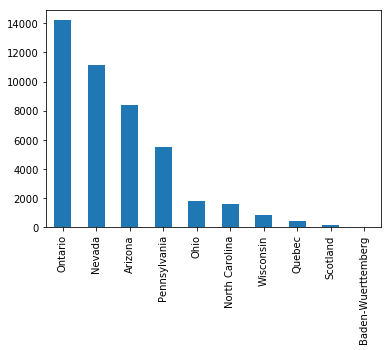

In [131]:
import matplotlib.pyplot as plt
review['user_state'][:44000].value_counts().plot(kind='bar')
plt.show()

In [133]:
review['user_city'][:44000].value_counts()

Toronto                    9514
Spring Valley              5660
Paradise                   3945
North York                 3559
Bloomfield                 3195
Paradise Valley            2966
Pittsburgh                 1487
Charlotte                  1411
Glendale                   1149
Tempe Junction             1063
Las Vegas                  1050
Phoenix                     801
Cleveland                   794
Peoria                      741
Madison                     694
Millvale                    518
Etobicoke                   430
Mississauga                 426
Surprise                    359
Montreal                    350
San Carlos                  277
Tempe                       252
Mentor                      242
Willowdale                  238
Winchester                  237
Sun City                    229
Enterprise                  221
Brooklyn                    147
Belmont                     141
Scottsdale                  133
                           ... 
Monona  